# OpenCV Selective Search 
> OpenCV Selective Search for Object Detection

- toc: true 
- badges: true
- comments: true
- categories: [Image Processing, OpenCV]
- image: images/chart-preview.png

In [1]:
import tensorflow as tf
import numpy as np
import argparse
import cv2
print(tf.__version__)
print(cv2.__version__)
import matplotlib.pyplot as plt
import time

2.3.0
4.4.0


## 1. Selective Search for Objection Recognition (2012)

 - Replaces sliding window and hierachical pyramids technique. The tenchique does not perfoms classification  by itself (at needs a classifier for that)

 - Selective Search is far more computationally efficient than exhaustively computing image pyramids and sliding windows (very slow + additional parameters to be tuned) 

- Image can be over-segmented to automatically identify locations in an image that could contain an object

- Paved the way for RPN (Region Proposal Network) & R-CNN 


## 2. Algorithm steps
1. Accepts an image as input
2. Over-segment it by applying a superpixel clustering algorithm
3. Merge segments of the superpixels based on five components:
 - Color similarity
 - Texture similarity
 - Size similarity
 - Shape similarity
 - A final meta-similarity, which is a linear combination of the above similarity measures 


## 3. Region proposal algorithm needs

- Be faster and more efficient than sliding windows and image pyramids
- Accurately detect the regions of an image that could contain an object
- Pass these “candidate proposals” to a downstream classifier to actually label the regions, thus completing the object detection framework

In [2]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", default =  "images/keras_detection/dlui03.jpg", required = False,
    help="path to the input image")
ap.add_argument("-m", "--method", type=str, default="fast",
    choices=["fast", "quality"],
    help="selective search method")
args = vars(ap.parse_args([]))

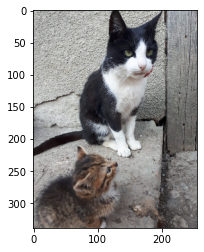

In [3]:
image = cv2.imread(args["image"])
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
w = 255
scale = w/(image.shape[1])
h = int(scale * image.shape[0])
image = cv2.resize(image, (w, h))
plt.imshow(image)

In [4]:
# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# check to see if we are using the *fast* but *less accurate* version
# of selective search
if args["method"] == "fast":
    print("[INFO] using *fast* selective search")
    ss.switchToSelectiveSearchFast()

# otherwise we are using the *slower* but *more accurate* version
else:
    print("[INFO] using *quality* selective search")
    ss.switchToSelectiveSearchQuality()

# run selective search on the input image

[INFO] using *fast* selective search


In [ ]:
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()

# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
    # clone the original image so we can draw on it
    output = image.copy()

    # loop over the current subset of region proposals
    for (x, y, w, h) in rects[i:i + 100]:
        # draw the region proposal bounding box on the image
        color = [np.random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)

    # show the output image
    #cv2.imshow("Output", output) 
    plt.imshow(output) #cv2.imshow("Output", output)
    #key = cv2.waitKey(0) & 0xFF

    # if the `q` key was pressed, break from the loop
    #if key == ord("q"):
    #    break

[INFO] selective search took 0.8691 seconds
[INFO] 707 total region proposals


## References

> References: https://www.pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/

![](images/dlui01_selectiveSearch.png)